# Identify Fraud from Enron Email
## Using Machine Learning Techniques
### by David Vartanian

## References

### Documentation links:

* http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
* http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html

In [1]:
# notebook/visualisation imports
import matplotlib.pyplot as plt
from IPython.display import display
%load_ext autoreload
%autoreload 2

In [2]:
# poi_id.py
#!/usr/bin/python

import sys
import pickle
from time import time

from udacity import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

/home/david/anaconda3/envs/udml/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'bonus', 'director_fees', 'other', 'exercised_stock_options', 'expenses'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
print 'Keys:'
display(sorted(data_dict[data_dict.keys()[0]].keys()))

Keys:


['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

### Keys:

* **bonus**: Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.
* **deferral_payments**: Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.
* **deferred_income**: Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors under a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.
* **director_fees**: Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.
* **email_address**: This person's email address
* **exercised_stock_options**: Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through cashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price and the timing of any subsequent sale of the securities.
* **expenses**: Reflects reimbursements of business expenses. May include fees paid for consulting services.
* **from_messages**: Messages sent from this person
* **from_poi_to_this_person**: Messages sent from this person to a POI
* **from_this_person_to_poi**: Messages sent from a POI to this person
* **loan_advances**: Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the promissory notes allow for the option to repay with stock of the company.
* **long_term_incentive**: Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measured against key performance drivers and business objectives over a multi-year period, generally 3 to 5 years.
* **other**: Reflects items such as payments for severence, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e. housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect to employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.
* **poi**: Whether this person is a POI
* **restricted_stock**: Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vesting periods, regardless of whether deferred.
* **restricted_stock_deferred**: Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.
* **salary**: Reflects items such as base salary, executive cash allowances, and benefits payments.
* **shared_receipt_with_poi**: Bill shared with a POI
* **to_messages**: Messages sent to this person
* **total_payments**: Sum of all payments
* **total_stock_value**: Sum of all stock operations

#### Possible POI financial features

* bonus
* deferral_payments
* deffered_income
* director_fees
* exercised_stock_options
* expenses
* long_term_incentive
* other

#### Possible POI non-financial features

* from_poi_to_this_person
* from_this_person_to_poi
* shared_receipt_with_poi


#### Comments
I need to know what all variables mean in order to come up with possible outliers and feature selection/engineering.

Distribution of salary:


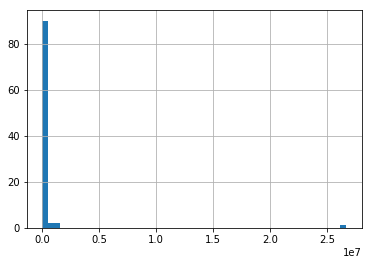

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([ 211816.,  312117.]),
 'max': 26704229.0,
 'mean': 365811.35616438359,
 'median': 259996.0,
 'min': 477.0,
 'std': 2702034.6526232096}

Distribution of bonus:


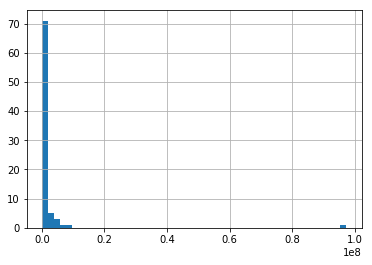

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([  431250.,  1200000.]),
 'max': 97343619.0,
 'mean': 1333474.2328767122,
 'median': 769375.0,
 'min': 70000.0,
 'std': 10647802.412658392}

Distribution of director_fees:


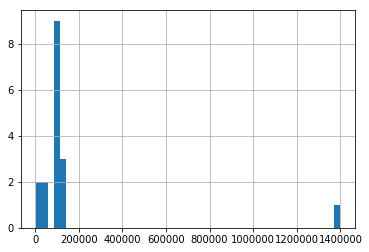

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([  98784.,  113784.]),
 'max': 1398517.0,
 'mean': 19422.486301369863,
 'median': 108579.0,
 'min': 3285.0,
 'std': 310340.25202725327}

Distribution of other:


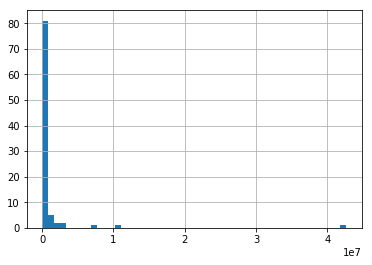

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([   1215.,  362096.]),
 'max': 42667589.0,
 'mean': 585431.79452054796,
 'median': 52382.0,
 'min': 2.0,
 'std': 4564512.8195495447}

Distribution of exercised_stock_options:


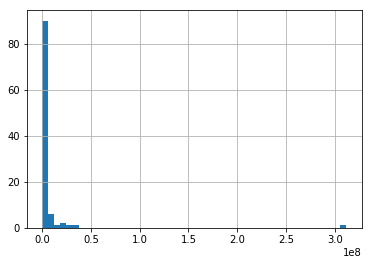

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([  527886.25,  2547724.  ]),
 'max': 311764000.0,
 'mean': 4182736.1986301369,
 'median': 1310813.5,
 'min': 3285.0,
 'std': 30909366.79217739}

Distribution of expenses:


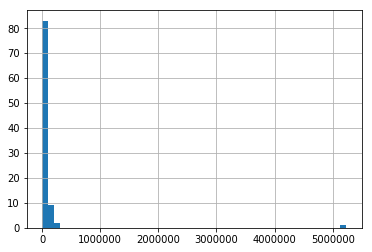

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([ 22614. ,  79952.5]),
 'max': 5235198.0,
 'mean': 70748.267123287675,
 'median': 46950.0,
 'min': 148.0,
 'std': 530719.30731012637}

In [4]:
### Task 2: Remove outliers
from outlier import OutlierCleaner
from visualisation import scatter_plot
from outlier import summary


data_keys = data_dict.keys()

for k in features_list[1:]:
    print 'Distribution of %s:' % k
    display(summary(data_dict, k, data_keys))

In [4]:
### Task 2: Remove outliers

# remove known TOTAL outlier
data_dict.pop('TOTAL', 0)
len(data_dict)
# data = featureFormat(data_dict, features_list)
# labels, features = targetFeatureSplit(data)

145

In [5]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
import pandas as pd

my_df = pd.DataFrame(data_dict.values(), columns=data_dict[data_dict.keys()[0]].keys(), index=data_dict.keys())
#my_dataset = data_dict

#  new features ideas
# * from_messages/from_this_person_to_poi ratio
# * to_messages/from_poi_to_this_person ratio
# * POIs mentioned in emails

In [6]:
### Task 3: Create new feature(s)
# Features: 
# - from_poi_to_this_person_ratio
# - from_this_person_to_poi
from feature_engineering import compute_poi_email_ratio

my_df['from_poi_to_this_person_ratio'] = my_df.apply(lambda row: compute_poi_email_ratio(
    row['from_poi_to_this_person'], row['to_messages']), axis=1)
my_df['from_this_person_to_poi_ratio'] = my_df.apply(lambda row: compute_poi_email_ratio(
    row['from_this_person_to_poi'], row['from_messages']), axis=1)

In [7]:
### Task 3: Create new feature(s)
# Features: 
# - email_addresses_per_poi
# - poi_mention_rate
import numpy as np
from feature_engineering import poi_email_dict, find_pois_in_data_point, poi_vectorizer, compute_email_addresses_per_poi, compute_poi_mention_rate

# high rate of mentioned pois: keep it!
# high rate of email addresses per poi: keep it!

vectorizer = poi_vectorizer(poi_email_dict)
n_pois = len(my_df.index)

def compute_email_addresses_per_poi_df(row):
    found_pois, poi_count = find_pois_in_data_point(row, vectorizer, poi_email_dict)
    return compute_email_addresses_per_poi(found_pois, poi_count)

def compute_poi_mention_rate_df(row):
    _, poi_count = find_pois_in_data_point(row, vectorizer, poi_email_dict)
    return compute_poi_mention_rate(poi_count, n_pois)

my_df['email_addresses_per_poi'] = my_df.apply(lambda row: compute_email_addresses_per_poi_df(row), axis=1)
my_df['poi_mention_rate'] = my_df.apply(lambda row: compute_poi_mention_rate_df(row), axis=1)

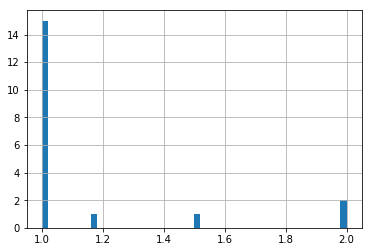

In [11]:
from visualisation import dist_plot

dist_plot(my_df[my_df['email_addresses_per_poi'] > 0]['email_addresses_per_poi'].values)

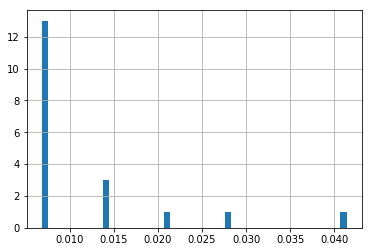

In [12]:
dist_plot(my_df[my_df['poi_mention_rate'] > 0.]['poi_mention_rate'].values)

In [13]:
### Task 3: Create new feature(s)
# Features:
# - common_vocabulary (failed, not using it in poi_id.py)
# try to find vocabulary patterns between potencial POIs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import cross_validation
from feature_engineering import get_email_data_from_pois
from sklearn.cluster import KMeans

email_data, email_authors = get_email_data_from_pois(my_dataset)
vocabf_train, vocabf_test, vocabl_train, vocabl_test = cross_validation.train_test_split(email_data, email_authors, test_size=0.1, random_state=42)

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.1, stop_words='english')
vocabf_train_transformed = vectorizer.fit_transform(vocabf_train)
vocabf_test_transformed  = vectorizer.transform(vocabf_test)

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(vocabf_train_transformed, vocabl_train)
vocabf_train_transformed = selector.transform(vocabf_train_transformed).toarray()
vocabf_test_transformed  = selector.transform(vocabf_test_transformed).toarray()
n_clusters = len(set(vocabl_train))
print 'Training KMeans with %d clusters.' % n_clusters
email_cluster = KMeans(n_clusters=n_clusters, random_state=42)
email_cluster.fit(vocabf_train_transformed, vocabl_train)
dist_plot(email_cluster.labels_)

NameError: name 'my_dataset' is not defined

In [102]:
# Testing email text cluster
text_p = vectorizer.transform("""For this, you will not only be a critical part of Enron's history, but you will also always deserve Enron's gratitude.""".split())
text_p = selector.transform(text_p)
display(email_cluster.predict(text_p.todense()))

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int32)

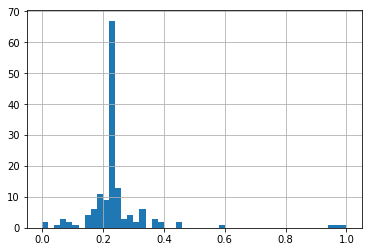

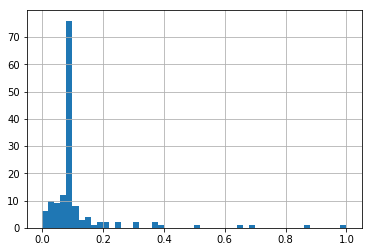

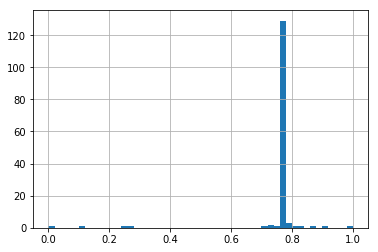

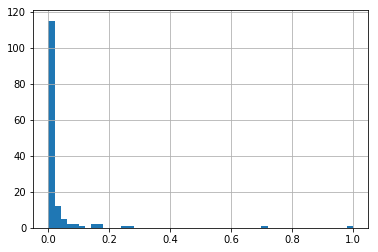

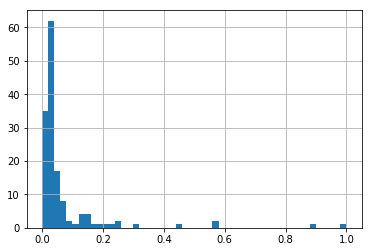

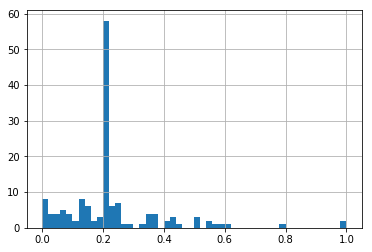

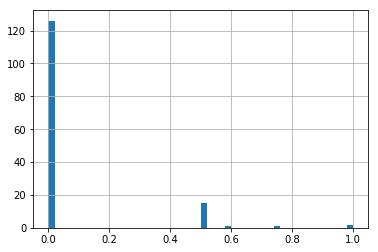

In [8]:
# Feature Scaling
from visualisation import dist_plot
from feature_engineering import scale_feature_df


my_df['salary_scaled'] = scale_feature_df(my_df, 'salary')
my_df['bonus_scaled'] = scale_feature_df(my_df, 'bonus')
my_df['director_fees_scaled'] = scale_feature_df(my_df, 'director_fees')
my_df['other_scaled'] = scale_feature_df(my_df, 'other')
my_df['exercised_stock_options_scaled'] = scale_feature_df(my_df, 'exercised_stock_options')
my_df['expenses_scaled'] = scale_feature_df(my_df, 'expenses')
my_df['email_addresses_per_poi_scaled'] = scale_feature_df(my_df, 'email_addresses_per_poi')

dist_plot(my_df['salary_scaled'].values)
dist_plot(my_df['bonus_scaled'])
dist_plot(my_df['director_fees_scaled'])
dist_plot(my_df['other_scaled'])
dist_plot(my_df['exercised_stock_options_scaled'])
dist_plot(my_df['expenses_scaled'])
dist_plot(my_df['email_addresses_per_poi_scaled'])

In [9]:
### Task 4: Try a variety of classifiers

# convert it back to dict, so that I can use featureFormat and targetFeatureSplit functions
my_dataset = my_df.to_dict(orient='index')
my_dataset
### Extract features and labels from dataset for local testing
#data = featureFormat(my_dataset, features_list, sort_keys = True)
#labels, features = targetFeatureSplit(data)

#from sklearn.model_selection import train_test_split
#features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.5, random_state=42, shuffle=False)
#display(labels_test)

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'bonus_scaled': 0.5176544766708702,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'director_fees_scaled': 0.7644543353717891,
  'email_address': 'phillip.allen@enron.com',
  'email_addresses_per_poi': 0.0,
  'email_addresses_per_poi_scaled': 0.0,
  'exercised_stock_options': 1729541,
  'exercised_stock_options_scaled': 0.050262076693970224,
  'expenses': 13868,
  'expenses_scaled': 0.06001355991514118,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_poi_to_this_person_ratio': 0.016195727084769126,
  'from_this_person_to_poi': 65,
  'from_this_person_to_poi_ratio': 0.029612756264236904,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'other_scaled': 1.4479146023828618e-05,
  'poi': False,
  'poi_mention_rate': 0.0,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'salary_scaled': 0.18138408921290516,
  'shared_rec

In [16]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
#from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()

# classifier.py
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [362]:
# RandomForestClassifier test
param_grid = dict(
    #reduce_dim__n_components=[1,2],
                  #feature_selection__k=[2,3,4,5,'all']
                 )

# Accuracy: 0.86407	Precision: 0.48490	Recall: 0.31300	F1: 0.38043	F2: 0.33689
steps = [
    ('feature_selection', SelectKBest(k=2)), 
    ('reduce_dim', PCA(random_state=42, n_components=2)), 
    ('clf', RandomForestClassifier(n_estimators=40, random_state=42))]
pipe = Pipeline(steps)
#grid_search = GridSearchCV(pipe, param_grid=param_grid)
#grid_search.fit(features_train, labels_train)
#display(grid_search)
#pred = grid_search.predict(features_test)
#display(pred)
#display(grid_search.score(features_test, labels_test))  # 0.86206896551724133

from tester import test_classifier
print 'testing classifier...'
test_classifier(clf=pipe, dataset=my_dataset, feature_list=features_list)
print 'elapsed time: %s seconds' % (time() - t0)

testing classifier...
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=2, score_func=<function f_classif at 0x7ffac538c7d0>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, cri...stimators=40, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])
	Accuracy: 0.86407	Precision: 0.48490	Recall: 0.31300	F1: 0.38043	F2: 0.33689
	Total predictions: 15000	True positives:  626	False positives:  665	False negatives: 1374	True negatives: 12335

elapsed time: 540.656071901 seconds


In [363]:
# SVC test
param_grid = dict(
    #reduce_dim__n_components=[1,2],
                  #feature_selection__k=[2,5,'all'],
                  clf__kernel=['linear', 'rbf'],
                  clf__C=[1.,1000.,10000.],
                  clf__gamma=[0.1,0.5,1.0,'auto'])

# Accuracy: 0.81040	Precision: 0.29554	Recall: 0.30500	F1: 0.30020	F2: 0.30306
steps = [
    ('feature_selection', SelectKBest(k=6)), 
    ('reduce_dim', PCA(random_state=42, n_components=6)), 
    ('clf', SVC(random_state=42, kernel='rbf', C=23000, gamma=.587))]
pipe = Pipeline(steps)

#grid_search = GridSearchCV(pipe, param_grid=param_grid)
#grid_search.fit(features_train, labels_train)
#display(grid_search)
#pred = grid_search.predict(features_test)
#display(pred)
#display(grid_search.score(features_test, labels_test))  # 0.89655172413793105

from tester import test_classifier
print 'testing classifier...'
t0 = time()
test_classifier(clf=pipe, dataset=my_dataset, feature_list=features_list)
print 'elapsed time: %s seconds' % (time() - t0)

testing classifier...
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=6, score_func=<function f_classif at 0x7ffac538c7d0>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=6, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=23000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.587, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.81040	Precision: 0.29554	Recall: 0.30500	F1: 0.30020	F2: 0.30306
	Total predictions: 15000	True positives:  610	False positives: 1454	False negatives: 1390	True negatives: 11546

elapsed time: 9.31182122231 seconds


In [356]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

param_grid = dict(
    #reduce_dim__n_components=[1,2],
                  #feature_selection__k=[2,5,'all'],
                  #clf__base_estimator=[DecisionTreeClassifier(), SVC(C=10000, random_state=42, gamma=0.5), GaussianNB()],
                  #clf__n_estimators=[10,50,100],
                  #clf__learning_rate=[0.9,1.]
)

# Accuracy: 0.85460	Precision: 0.43806	Recall: 0.32000	F1: 0.36984	F2: 0.33823
steps = [
    ('feature_selection', SelectKBest(k=2)), 
    ('reduce_dim', PCA(random_state=42, n_components=2)), 
    ('clf', AdaBoostClassifier(algorithm='SAMME.R', random_state=42, n_estimators=40, learning_rate=1.))]
pipe = Pipeline(steps)

#grid_search = GridSearchCV(pipe, param_grid=param_grid)
#grid_search.fit(features_train, labels_train)
#display(grid_search)
#pred = grid_search.predict(features_test)
#display(pred)
#display(grid_search.score(features_test, labels_test))  # 0.89655172413793105

from tester import test_classifier
print 'testing classifier...'
t0 = time()
test_classifier(clf=pipe, dataset=my_dataset, feature_list=features_list)
print 'elapsed time: %s seconds' % (time() - t0)

testing classifier...
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=2, score_func=<function f_classif at 0x7ffac538c7d0>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=40, random_state=42))])
	Accuracy: 0.85460	Precision: 0.43806	Recall: 0.32000	F1: 0.36984	F2: 0.33823
	Total predictions: 15000	True positives:  640	False positives:  821	False negatives: 1360	True negatives: 12179

elapsed time: 69.7856121063 seconds


In [19]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

param_grid = dict(
                  #reduce_dim__n_components=[1,2],
                  #feature_selection__k=[2,4,6,'all'],
                  #clf__n_neighbors=[2,3,4,5],
                  #clf__weights=['uniform','distance'],
                  #clf__algorithm=['auto','ball_tree','kd_tree','brute'],
                  #clf__leaf_size=[2,3,4,5],
                  #clf__p=[1,2]
)

# Accuracy: 0.84753	Precision: 0.41147	Recall: 0.33350	F1: 0.36841	F2: 0.34664
steps = [
    ('feature_selection', SelectKBest(k=2)), 
    ('reduce_dim', PCA(random_state=42, n_components=2)), 
    ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=4, n_neighbors=4, p=2, weights='distance'))
]
clf = Pipeline(steps)
#grid_search = GridSearchCV(pipe, param_grid=param_grid)
#grid_search.fit(features_train, labels_train)
#display(grid_search)
#pred = grid_search.predict(features_test)
#display(pred)
#display(grid_search.score(features_test, labels_test))  # 0.86206896551724133

from tester import test_classifier
print 'testing classifier...'
t0 = time()
test_classifier(clf=clf, dataset=my_dataset, feature_list=features_list)
print 'elapsed time: %s seconds' % (time() - t0)

testing classifier...
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=2, score_func=<function f_classif at 0x7f0ca8d187d0>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])
	Accuracy: 0.84343	Precision: 0.43220	Recall: 0.30600	F1: 0.35831	F2: 0.32498
	Total predictions: 14000	True positives:  612	False positives:  804	False negatives: 1388	True negatives: 11196

elapsed time: 1.72977209091 seconds


In [20]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
dump_classifier_and_data(clf, my_dataset, features_list)

In [21]:
# tester.py
from tester import main as project_tester
project_tester()

Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=2, score_func=<function f_classif at 0x7f0ca8d187d0>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])
	Accuracy: 0.84343	Precision: 0.43220	Recall: 0.30600	F1: 0.35831	F2: 0.32498
	Total predictions: 14000	True positives:  612	False positives:  804	False negatives: 1388	True negatives: 11196



# Process Comments
## Outlier Removal

* I've found [this](https://discussions.udacity.com/t/seems-like-a-gremlin-in-the-data/296901) about a difference between Udacity's and FindLaw's datasets, but I don't find it relevan for the purpose of this project.
* Apart from the well known TOTAL data point, I consider other outliers actually useful, since we are looking for persons of interest, who are precisely not part of the average.

## Feature Scaling

* NaN treatment: I will assign the median salary to data points with missing values, since this average is not affected by outliers as mean is.

## Feature Engineering
All new feature logic is implemented in *feature_engineering.py* file. Functions with prefix *compute_* are used to get the final values for the dataset.

* **from_poi_to_this_person_ratio**: number of messages received from a POI divided by the number of all received messages
* **from_this_person_to_poi_ratio**: number of messages sent to a POI divided by the number of all sent messages
* **email_addresses_per_poi**: amount of email addresses referring to the same POI divided by the number of POIs mentioned in all emails from/to a person
* **poi_mention_rate**: amount of emails where a POI is mentioned divided by all emails from/to a person
* **common_vocabulary (failed)**: The idea was to create clusters of vocabulary from email text in order to detect possible POI patterns, setting TfIdfVectorizer to index only up to 10% document frequency, selecting 10% of vocabulary afterwards, and finally training a KMeans object with n_clusters=number of unique recognised POIs. There are two problems here: First, it predicts the same cluster almost all the time. The second problem is that I don't get only one label, but an array of labels with variable size, depending on how long the email text is. It seems that I have to learn more about this implementation. For the purpose of this project, I'd rather not use this feature for now.

## Classifier Selection
Given the following results, I will keep *KNeighborsClassifier*. Results are quite similar to AdaBoostClassifier, but KNeighborsClassifier was much more efficient in processing time. 

### RandomForestClassifier
* Accuracy: 0.86407	Precision: 0.48490	Recall: 0.31300	F1: 0.38043	F2: 0.33689
* Total predictions: 15000	True positives:  626	False positives:  665	False negatives: 1374	True negatives: 12335
* Elapsed time: 540.656071901 seconds

### SVC
* Accuracy: 0.81040	Precision: 0.29554	Recall: 0.30500	F1: 0.30020	F2: 0.30306
* Total predictions: 15000	True positives:  610	False positives: 1454	False negatives: 1390	True negatives: 11546
* Elapsed time: 9.31182122231 seconds
* What is really remarkable from SVM is that it had better performance with more features. I got these results selecting the best 6.

### AdaBoostClassifier
* Accuracy: 0.85460	Precision: 0.43806	Recall: 0.32000	F1: 0.36984	F2: 0.33823
* Total predictions: 15000	True positives:  640	False positives:  821	False negatives: 1360	True negatives: 12179
* Elapsed time: 69.7856121063 seconds
    
### KNeighborsClassifier
* Accuracy: 0.84753	Precision: 0.41147	Recall: 0.33350	F1: 0.36841	F2: 0.34664
* Total predictions: 15000	True positives:  667	False positives:  954	False negatives: 1333	True negatives: 12046
* Elapsed time: 1.72642588615 seconds


## Enron Submission Free-Response Questions

### Question 1 
Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]



### Question 2
What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]



### Question 3
What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]


### Question 4
What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]



### Question 5
What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]



### Question 6
Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

